In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [18]:
#MAPE 
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
df = pd.read_csv('datameetupr (2).csv', index_col=[0], parse_dates=['date'])

In [28]:
df.head()

,Daily Active Users
date,
2013-01-01,1567
2013-01-02,3267
2013-01-03,4058
2013-01-04,4003
2013-01-05,3902


In [29]:
df.tail()

,Daily Active Users
date,
2015-06-09,7078
2015-06-10,12598
2015-06-11,13634
2015-06-12,13756
2015-06-13,13559


In [30]:
df.describe()

,Daily Active Users
count,894.000000
mean,8699.209172
std,3472.651537
min,257.000000
25%,5563.500000
50%,8957.000000
75%,11867.250000
max,15427.000000


In [31]:
split_date = '29-Jan-2015'
data_train = df.loc[df.index <= split_date].copy()
data_test = df.loc[df.index > split_date].copy()

In [38]:
df = df.reset_index().rename(columns={'date':'ds', 'Daily Active Users':'y'})

In [40]:
# Setup and train model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
# Predict on training set with model
data_test_fcst = model.predict(df=data_test.reset_index().rename(columns={'date':'ds'}))


In [42]:
data_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-30,12023.344642,11604.918140,14665.392002,12023.344642,12023.344642,1094.013830,1094.013830,1094.013830,475.118283,475.118283,475.118283,618.895547,618.895547,618.895547,0.0,0.0,0.0,13117.358472
1,2015-01-31,12019.077949,11693.189323,14698.981162,12019.077949,12019.077949,1053.295944,1053.295944,1053.295944,440.638672,440.638672,440.638672,612.657273,612.657273,612.657273,0.0,0.0,0.0,13072.373893
2,2015-02-01,12014.811255,11169.062958,14119.855866,12014.811255,12014.811255,604.659045,604.659045,604.659045,-1.603221,-1.603221,-1.603221,606.262266,606.262266,606.262266,0.0,0.0,0.0,12619.470300
3,2015-02-02,12010.544562,10323.078642,13285.664448,12010.544562,12010.544562,-211.013685,-211.013685,-211.013685,-810.947209,-810.947209,-810.947209,599.933524,599.933524,599.933524,0.0,0.0,0.0,11799.530877
4,2015-02-03,12006.277869,9380.322183,12335.691693,12006.277869,12006.277869,-1085.202213,-1085.202213,-1085.202213,-1679.079150,-1679.079150,-1679.079150,593.876937,593.876937,593.876937,0.0,0.0,0.0,10921.075656


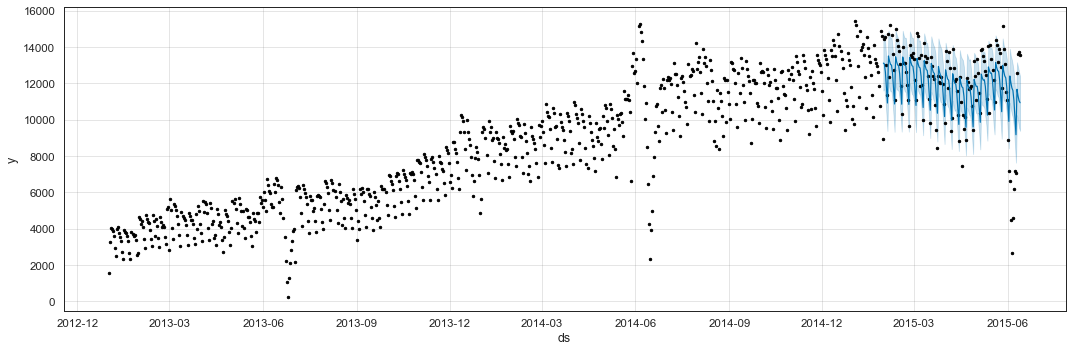

In [43]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_test_fcst, ax=ax)

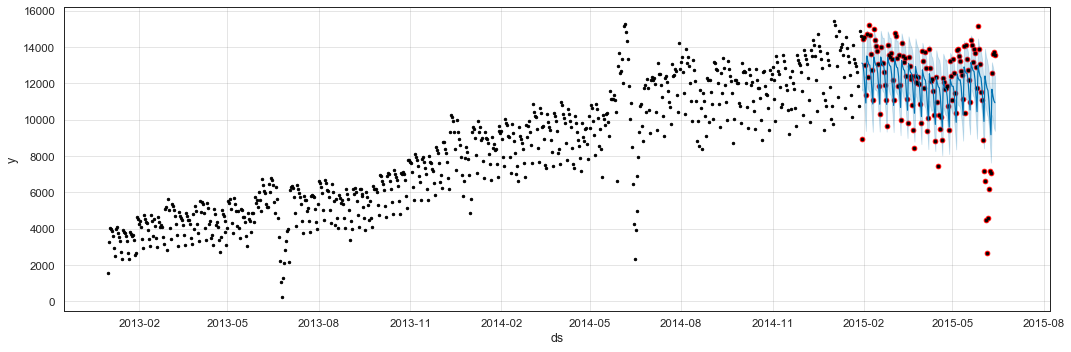

In [44]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['Daily Active Users'], color='r')
fig = model.plot(data_test_fcst, ax=ax)

In [45]:
mean_absolute_percentage_error(y_true=data_test['Daily Active Users'],
                   y_pred=data_test_fcst['yhat'])

14.235767881030783